/tmp/ipython-input-2-3459329774.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.1163
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0125
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0076
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0067
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0059
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0058
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0061
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0059
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0047
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0051
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0067
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0050
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0040
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0052
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0047
E

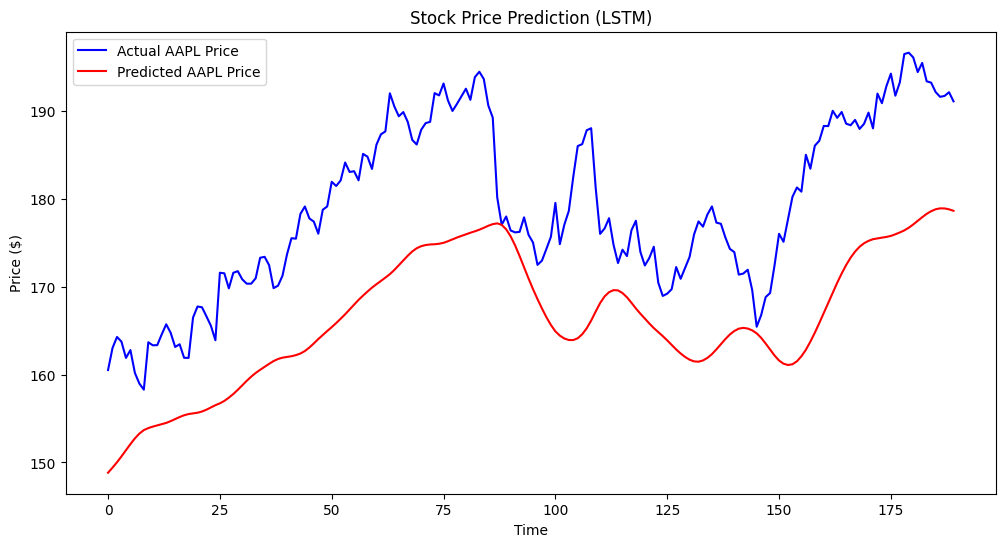

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fetch stock data (e.g., Apple)
def fetch_data(stock_symbol="AAPL", start_date="2020-01-01", end_date="2023-12-31"):
    data = yf.download(stock_symbol, start=start_date, end=end_date)
    return data['Close'].values.reshape(-1, 1)

# Preprocess data
def preprocess_data(data, lookback=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Build LSTM model
def build_model(lookback):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Main execution
if __name__ == "__main__":
    # Fetch and preprocess data
    stock_data = fetch_data()
    lookback = 60
    X, y, scaler = preprocess_data(stock_data, lookback)

    # Split into train/test (80-20)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Train model
    model = build_model(lookback)
    model.fit(X_train, y_train, epochs=20, batch_size=32)
    model.save("model.keras")

    # Predict on test data
    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Visualize
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, color='blue', label=f"Actual AAPL Price")
    plt.plot(predicted_prices, color='red', label=f"Predicted AAPL Price")
    plt.title("Stock Price Prediction (LSTM)")
    plt.xlabel("Time")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.savefig("stock_plot.png")
    plt.show()